### Problem Statement

An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial. The trial had 2100 participants. Half were under 65 years old, and the other half were over 65 years old. Around 95% of the participants 65 or older experienced side-effects from the drug and 95% of those under 65 experienced no side-effects at all.

### Task

Design a sequential neural network model that correctly predicts whether a partcipant is likely to experience side-effects from the experimental drug.

### Data Preparation and Preprocessing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []
test_labels = []
test_samples = []

#### Creating the training dataset

In [3]:
for i in range(50):
    # data for participants younger than 65 years old who experienced side-effects (~5%)
    less_than_65 = randint(13, 64)
    train_samples.append(less_than_65)
    train_labels.append(1) # 1 for experienced side-effects
    
    # data for older participants with no side-effects (~5%)
    at_least_65 = randint(65, 100)
    train_samples.append(at_least_65)
    train_labels.append(0) # 0 for no side-effects
    
for i in range(1000):
    # data for participants younger than 65 years old who experienced no side-effects (~95%)
    less_than_65 = randint(13, 64)
    train_samples.append(less_than_65)
    train_labels.append(0)
    
    # data for older participants with side-effects (~95%)
    at_least_65 = randint(65, 100)
    train_samples.append(at_least_65)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
for i in range(10):
    # data for participants younger than 65 years old who experienced side-effects (~5%)
    less_than_65 = randint(13, 64)
    test_samples.append(less_than_65)
    test_labels.append(1) # 1 for experienced side-effects
    
    # data for older participants with no side-effects (~5%)
    at_least_65 = randint(65, 100)
    test_samples.append(at_least_65)
    test_labels.append(0) # 0 for no side-effects
    
for i in range(200):
    # data for participants younger than 65 years old who experienced no side-effects (~95%)
    less_than_65 = randint(13, 64)
    test_samples.append(less_than_65)
    test_labels.append(0)
    
    # data for older participants with side-effects (~95%)
    at_least_65 = randint(65, 100)
    test_samples.append(at_least_65)
    test_labels.append(1)

In [7]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-02-15 01:58:34.128189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/davianc/HADOOP/lib/native:
2022-02-15 01:58:34.128216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

2022-02-15 01:58:35.807494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/davianc/HADOOP/lib/native:
2022-02-15 01:58:35.807519: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 01:58:35.807537: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (drc-02): /proc/driver/nvidia/version does not exist
2022-02-15 01:58:35.807722: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x=scaled_train_samples, y =train_labels, batch_size=10, validation_split=0.3, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
147/147 - 1s - loss: 0.6900 - accuracy: 0.4789 - val_loss: 0.6845 - val_accuracy: 0.5238 - 705ms/epoch - 5ms/step
Epoch 2/30
147/147 - 0s - loss: 0.6803 - accuracy: 0.5469 - val_loss: 0.6746 - val_accuracy: 0.5841 - 190ms/epoch - 1ms/step
Epoch 3/30
147/147 - 0s - loss: 0.6701 - accuracy: 0.6000 - val_loss: 0.6615 - val_accuracy: 0.6683 - 182ms/epoch - 1ms/step
Epoch 4/30
147/147 - 0s - loss: 0.6529 - accuracy: 0.6844 - val_loss: 0.6362 - val_accuracy: 0.7778 - 180ms/epoch - 1ms/step
Epoch 5/30
147/147 - 0s - loss: 0.6261 - accuracy: 0.7823 - val_loss: 0.6094 - val_accuracy: 0.8317 - 175ms/epoch - 1ms/step
Epoch 6/30
147/147 - 0s - loss: 0.6038 - accuracy: 0.8041 - val_loss: 0.5880 - val_accuracy: 0.8413 - 174ms/epoch - 1ms/step
Epoch 7/30
147/147 - 0s - loss: 0.5829 - accuracy: 0.8170 - val_loss: 0.5655 - val_accuracy: 0.8492 - 179ms/epoch - 1ms/step
Epoch 8/30
147/147 - 0s - loss: 0.5612 - accuracy: 0.8272 - val_loss: 0.5424 - val_accuracy: 0.8714 - 173ms/epoch - 1ms/step


In [13]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=2)

42/42 - 0s - 93ms/epoch - 2ms/step


In [15]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes, normalize=True, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm .astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised Confusion Matrix")
    else:
        print("Confusion Matrix without Normalisation")
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Normalised Confusion Matrix
[[188  22]
 [ 10 200]]


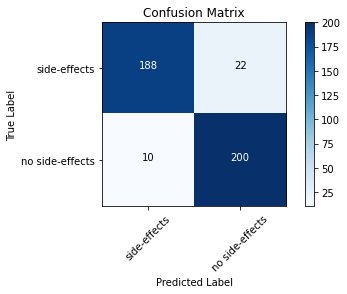

In [20]:
cm_plot_labels = ['side-effects', 'no side-effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

The confusion matrix show that our model is performing very well recording 188 True Positives and 200 True Negatives, and minimally recording only 10 and 22 False Positives and True Negatives respectively.

In [21]:
model.save("SeqNNModel.model")

2022-02-15 02:06:30.052319: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: SeqNNModel.model/assets
